In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import hyperspy.api as hys
from sklearn.decomposition import NMF, KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, OPTICS, cluster_optics_dbscan
import malspy
import tkinter.filedialog as tkf
import ipywidgets as pyw

In [2]:
%matplotlib inline

In [3]:
def warp_scale(spectrum):
    spectrum = spectrum.clip(min=0.0)
    min_val = np.min(spectrum)
    
    rescaled = spectrum - min_val
    
    if np.max(rescaled) != 0:
        rescaled = rescaled / np.max(rescaled)
    
    return rescaled

In [4]:
dm_files = tkf.askopenfilenames()
print(len(dm_files))
print(dm_files)

1
('E:/data_temporary/data_processed/20191111_pdf_normalized/kp_var/BSET01_05_scan_x256_y256_kp_var_radial.hdf5',)


In [ ]:
dm_files = list(dm_files)
dm_files.extend(tkf.askopenfilenames())
print(len(dm_files))
print(dm_files)

In [ ]:
dm_files = list(dm_files)
dm_files.extend(tkf.askopenfilenames())
print(len(dm_files))
print(dm_files)

In [5]:
data_storage = []
data_shape = []
for i, adr in enumerate(dm_files):
    temp = hys.load(adr)
    temp = temp.data
    print(temp.shape)
    
    data_shape.append(temp.shape)
    data_storage.append(temp)
    
if len(dm_files) == 1:
    for i, adr in enumerate(dm_files):
        temp = hys.load(adr)
        temp = temp.data
        print(temp.shape)
    
        data_shape.append(temp.shape)
        data_storage.append(temp)

(252, 44, 91)
(252, 44, 91)


In [6]:
cut_point = 21
num_img = len(data_storage)

data_shape = np.asarray(data_shape)
print(data_shape)
#s_dim = np.min(data_shape[:, 2])
s_dim = 61
dataset = []
data_shape_new = []

cluster_size_y = 1
cluster_size_x = 1
stride_y = 1
stride_x = 1

for img in data_storage:
    height = len(range(0, img.shape[0]-cluster_size_y+1, stride_y))
    width = len(range(0, img.shape[1]-cluster_size_x+1, stride_x))
    data_shape_new.append([height, width])
    temp= []
    for i in range(0, img.shape[0]-cluster_size_y+1, stride_y):
        for j in range(0, img.shape[1]-cluster_size_x+1, stride_x):
            #temp_sum = warp_scale(np.sum(img[i:i+cluster_size_y, j:j+cluster_size_x, cut_point:], axis=(0, 1)))
            temp_sum = np.sum(img[i:i+cluster_size_y, j:j+cluster_size_x, cut_point:s_dim], axis=(0, 1))
            temp.append(temp_sum)
    temp = np.asarray(temp).reshape(height, width, s_dim-cut_point)
    dataset.append(temp)

s_dim = s_dim - cut_point
data_shape_new = np.asarray(data_shape_new)
print(data_shape_new)
print(s_dim)

[[252  44  91]
 [252  44  91]]
[[252  44]
 [252  44]]
40


In [7]:
img_storage = []

for i in range(num_img):
    img_storage.append(np.sum(data_storage[i], axis=2))
            
#for i in range(num_img):
#    plt.imshow(img_storage[i])
#    plt.show()

In [8]:
def colortable(colors, title, sort_colors=True, emptycols=0):
    
    by_hsv = ((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                    for name, color in colors.items())
    if sort_colors is True:
        by_hsv = sorted(by_hsv)
    names = [name for hsv, name in by_hsv]
    
    return names

color_name = colortable(mcolors.CSS4_COLORS, "CSS Colors")
num_color = len(color_name)
print(len(color_name))

ri = np.random.choice(num_color, num_color, replace=False)
ri = np.sort(ri)
print(ri)
color_cand = {}
for i in range(num_color):
    color_cand[i] = color_name[ri[i]]

148
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]


In [9]:
# only one color
class_group = []
color_group = []
for i in range(num_img):
    for j in range(data_shape_new[i, 0]):
        for k in range(data_shape_new[i, 1]):
            color_group.append("red")

In [10]:
dataset_input = []
for i in range(num_img):
    dataset_input.extend(dataset[i].clip(min=0.0).reshape(-1, s_dim).tolist())
    
dataset_input = np.asarray(dataset_input)
print(dataset_input.shape)

(22176, 40)


In [18]:
color_rep = ["red", "yellow", "blue", "green", "purple", "gray", "orange", "lime", "cyan", "magenta", "lightgray", "peru", "springgreen", "deepskyblue", "hotpink"]
print(len(color_rep))
num_comp = 3

15


Training NMF with ARD and soft orthogonal constraint....
1th iteration of NMF-ARD-SO algorithm
# updates: 49
2th iteration of NMF-ARD-SO algorithm
# updates: 49
3th iteration of NMF-ARD-SO algorithm
# updates: 49


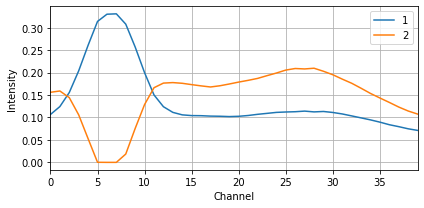

(22176, 2)
(2, 40)


In [24]:
# https://github.com/MotokiShiga/malspy
# NMF with automatic relevance determination and soft orthogonality penalty
model_nmf_ardso = malspy.NMF_ARD_SO(n_components=num_comp, wo=0.0, reps=3, max_itr=50)
model_nmf_ardso.fit(dataset_input)
model_nmf_ardso.plot_spectra(figsize=(6, 3), normalize=False)
projections = model_nmf_ardso.C_
print(projections.shape)
comp_vectors = model_nmf_ardso.S_
comp_vectors = np.rollaxis(comp_vectors, 1, 0)
print(comp_vectors.shape)
#num_comp = comp_vectors.shape[0]

Training NMF with soft orthogonal constraint....
1th iteration of NMF-SO algorithm
# updates: 49
2th iteration of NMF-SO algorithm
# updates: 49
3th iteration of NMF-SO algorithm
# updates: 49


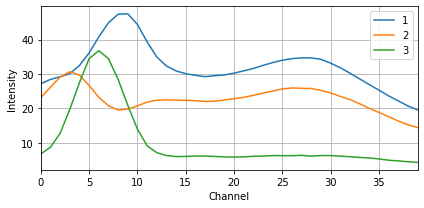

(22176, 3)
(3, 40)


In [28]:
# https://github.com/MotokiShiga/malspy
# NMF with soft orthogonality penalty
model_nmf_so = malspy.NMF_SO(n_components=num_comp, wo=0.1, reps=3, max_itr=50)
model_nmf_so.fit(dataset_input)
model_nmf_so.plot_spectra(figsize=(6, 3), normalize=False)
projections = model_nmf_so.C_
print(projections.shape)
comp_vectors = model_nmf_so.S_
comp_vectors = np.rollaxis(comp_vectors, 1, 0)
print(comp_vectors.shape)
#num_comp = comp_vectors.shape[0]

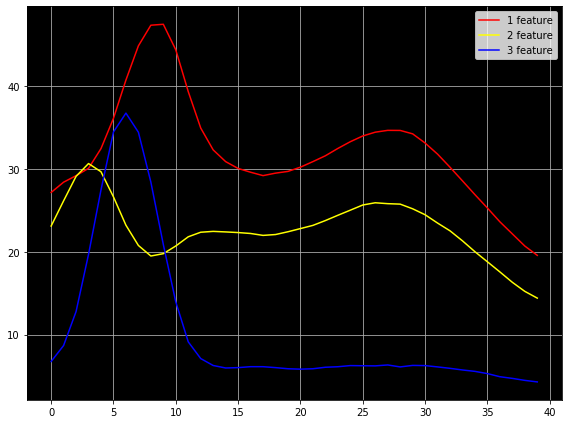

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(num_comp):
    ax.plot(comp_vectors[i], "-", c=color_rep[i], label="%d feature"%(i+1))
ax.grid()
ax.legend()
ax.set_facecolor("black")
fig.tight_layout()
plt.show()

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
skl_nmf = NMF(n_components=num_comp, init="nndsvd", solver="cd", max_iter=1000, 
              random_state=np.random.randint(100), verbose=False, beta_loss="frobenius", l1_ratio=0.5, alpha=0.5)
projections = skl_nmf.fit_transform(dataset_input)
comp_vectors = skl_nmf.components_
print(projections.shape)
print(comp_vectors.shape)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(num_comp):
    ax.plot(comp_vectors[i], "-", c=color_rep[i], label="%d component"%(i+1))
ax.grid()
ax.legend()
ax.set_facecolor("black")
fig.tight_layout()
plt.show()

In [ ]:
plt.close(fig)

In [ ]:
%matplotlib inline

In [39]:
num_comp_vis = 2
tsne = TSNE(n_components=num_comp_vis, perplexity=200, early_exaggeration=3.0, learning_rate=200.0, 
                init="random", n_iter=500, verbose=2, random_state=np.random.randint(100))
tsne.fit_transform(projections)
embedding = tsne.embedding_
print(embedding.shape)

plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], s=2, alpha=0.5)
plt.grid()
plt.show()

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 22176 samples in 0.030s...
[t-SNE] Computed neighbors for 22176 samples in 2.098s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22176
[t-SNE] Computed conditional probabilities for sample 2000 / 22176
[t-SNE] Computed conditional probabilities for sample 3000 / 22176
[t-SNE] Computed conditional probabilities for sample 4000 / 22176
[t-SNE] Computed conditional probabilities for sample 5000 / 22176
[t-SNE] Computed conditional probabilities for sample 6000 / 22176
[t-SNE] Computed conditional probabilities for sample 7000 / 22176
[t-SNE] Computed conditional probabilities for sample 8000 / 22176
[t-SNE] Computed conditional probabilities for sample 9000 / 22176
[t-SNE] Computed conditional probabilities for sample 10000 / 22176
[t-SNE] Computed conditional probabilities for sample 11000 / 22176
[t-SNE] Computed conditional probabilities for sample 12000 / 22176
[t-SNE] Computed conditional probabilities for sa

In [41]:
num_comp = num_comp_vis
projections = embedding

In [42]:
projections_copy = projections.copy()
print(projections_copy.shape)
projection_reshape = []
for i in range(num_img):
    temp = projections_copy[:int(data_shape_new[i, 0]*data_shape_new[i, 1]), :]
    print(temp.shape)
    projections_copy = np.delete(projections_copy, range(int(data_shape_new[i, 0]*data_shape_new[i, 1])), axis=0)
    print(projections_copy.shape)
    temp = np.reshape(temp, (data_shape_new[i, 0], data_shape_new[i, 1], -1))
    print(temp.shape)
    projection_reshape.append(temp)

(22176, 2)
(11088, 2)
(11088, 2)
(252, 44, 2)
(11088, 2)
(0, 2)
(252, 44, 2)


In [ ]:
%matplotlib qt
# for many images
fig1, ax1 = plt.subplots(1, num_img, figsize=(8, 6))
    
def map_selector(comp):
    for i, axs in enumerate(ax1):
        axs.cla()
        axs.imshow(projection_reshape[i][:, :, comp], cmap="afmhot")
        axs.set_title("component %d map"%(comp+1), fontsize=10)
        axs.axis("off")
    fig1.canvas.draw()
    fig1.tight_layout()
    
pyw.interact(map_selector, comp=pyw.IntSlider(min=0, max=num_comp-1, step=1, value=0))
fig1.show()

In [ ]:
plt.close(fig1)

In [40]:
%matplotlib qt
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 10))

def projection(c1, c2):
    ax2.cla()
    ax2.scatter(projections[:, c1], projections[:, c2], s=5, c=color_group, alpha=0.5)
    ax2.grid()
    ax2.set_xlabel("component %d"%(c1+1), fontsize=20)
    ax2.set_ylabel("component %d"%(c2+1), fontsize=20)
    fig2.canvas.draw()
    fig2.tight_layout()

x_widget = pyw.IntSlider(min=0, max=num_comp-1, step=1, value=0)
y_widget = pyw.IntSlider(min=0, max=num_comp-1, step=1, value=1)

pyw.interact(projection, c1=x_widget, c2=y_widget)
fig2.show()

interactive(children=(IntSlider(value=0, description='c1', max=2), IntSlider(value=1, description='c2', max=2)…

In [ ]:
plt.close(fig2)

In [ ]:
%matplotlib qt
# for many images
from matplotlib.widgets import EllipseSelector

comp_v1 = 2
comp_v2 = 3

fig3, ax3 = plt.subplots(1, 3, figsize=(20, 8))
ax3[0].scatter(projections[:, comp_v1], projections[:, comp_v2], s=3.0, alpha=0.5, c=color_group)
ax3[0].tick_params(axis="both", labelsize=15)
ax3[0].grid()
ax3[1].scatter(projections[:, comp_v1], projections[:, comp_v2], s=3.0, alpha=0.5, cmap="Set1")
ax3[1].tick_params(axis="both", labelsize=15)
ax3[1].grid()
ax3[2].plot(np.zeros(s_dim))
ax3[2].tick_params(axis="both", labelsize=15)
ax3[2].grid()

fig4, ax4 = plt.subplots(2, num_img, figsize=(10, 5))

cluster = []

for i in range(num_img):
    ax4[0][i].imshow(img_storage[i], cmap="gray")
    ax4[0][i].axis("off")
    ax4[1][i].imshow(img_storage[i], cmap="gray")
    ax4[1][i].axis("off")

def ellipse_equation(cx, cy, a, b, x, y):
    return ((x-cx)/a)**2 + ((y-cy)/b)**2

def onselect(eclick, erelease):
    center_x = (erelease.xdata + eclick.xdata) / 2.0
    center_y = (erelease.ydata + eclick.ydata) / 2.0
    a = abs((erelease.xdata - eclick.xdata) / 2.0)
    b = abs((erelease.ydata - eclick.ydata) / 2.0)
    #print(center_x)
    #print(center_y)
    #print(a)
    #print(b)
    
    temp = []
    spectra_sum = np.zeros(s_dim)
    
    color = []
    for i in range(len(dataset_input)):
        if ellipse_equation(center_x, center_y, a, b, projections[i, comp_v1], projections[i, comp_v2]) <= 1:
            #print("wow")
            temp.append(1)
            spectra_sum += dataset_input[i]
            color.append(1)
        else:
            temp.append(0)
            color.append(0)
            
    ax3[1].cla()
    ax3[1].scatter(projections[:, comp_v1], projections[:, comp_v2], s=3.0, alpha=0.5, c=color, cmap="Set1")
    ax3[1].grid()
    
    ax3[2].cla()
    ax3[2].plot(warp_scale(spectra_sum))
    ax3[2].grid()
    
    temp = np.asarray(temp)
    #print(temp.shape)
    selected = []
    for i in range(num_img):
        selected_temp = temp[:int(data_shape_new[i, 0]*data_shape_new[i, 1])]
        temp = np.delete(temp, range(int(data_shape_new[i, 0]*data_shape_new[i, 1])))
        selected_temp = np.reshape(selected_temp, data_shape_new[i])
        selected.append(selected_temp)
    
    for i in range(num_img):
        ax4[1][i].imshow(selected[i], cmap="Set1")
        ax4[1][i].axis("off")
        
    fig3.canvas.draw()
    fig4.canvas.draw()
    fig3.tight_layout()
    fig4.tight_layout()
    
    cluster.append(selected)
        
ep = EllipseSelector(ax3[0], onselect, drawtype="line")
plt.show()

In [ ]:
plt.close(fig3)
plt.close(fig4)
print(len(cluster))

In [ ]:
num_sel = 2
selected = []
for i in range(num_sel):
    selected.append(cluster[-(i+1)])
    
selected.reverse()

In [ ]:
# compare the reconstructed signals by clusters

comp_array = np.arange(num_comp)
#comp_array = np.array([1, 2])

reconstructed = np.dot(projections[:, comp_array], comp_vectors[comp_array])
print(reconstructed.shape)
reconstructed_copy = reconstructed.copy()
reconstructed_reshape = []

for i in range(num_img):
    temp = reconstructed_copy[:int(data_shape_new[i, 0]*data_shape_new[i, 1]), :]
    print(temp.shape)
    reconstructed_copy = np.delete(reconstructed_copy, range(int(data_shape_new[i, 0]*data_shape_new[i, 1])), axis=0)
    print(projections_copy.shape)
    temp = np.reshape(temp, (data_shape_new[i, 0], data_shape_new[i, 1], -1))
    print(temp.shape)
    reconstructed_reshape.append(temp)   

#for i in range(num_img):
#    for j in range(data_shape_new[i, 0]):
#        for k in range(data_shape_new[i, 1]):
#            reconstructed_reshape[i][j, k] = warp_scale(reconstructed_reshape[i][j, k])

In [55]:
# compare the original input signals by clusters

reconstructed_reshape = []
dataset_input_copy = dataset_input.copy()
for i in range(num_img):
    temp = dataset_input_copy[:int(data_shape_new[i, 0]*data_shape_new[i, 1]), :]
    dataset_input_copy = np.delete(dataset_input_copy, range(int(data_shape_new[i, 0]*data_shape_new[i, 1])), axis=0)
    temp = np.reshape(temp, (data_shape_new[i, 0], data_shape_new[i, 1], -1))
    reconstructed_reshape.append(temp)
    
#for i in range(num_img):
#    for j in range(data_shape_new[i, 0]):
#        for k in range(data_shape_new[i, 1]):
#            reconstructed_reshape[i][j, k] = warp_scale(reconstructed_reshape[i][j, k])

In [ ]:
# cluster vs. cluster in all individual images
lines = np.zeros((num_img, num_sel, s_dim))
sel_num = np.zeros((num_img, num_sel))

for h in range(num_img):
    for i in range(num_sel):
        for j in range(data_shape_new[h, 0]):
            for k in range(data_shape_new[h, 1]):
                if selected[i][h][j, k] == 1:
                    sel_num[h, i] += 1
                    lines[h, i] += reconstructed_reshape[h][j, k]

print(sel_num) 
#for h in range(num_img):            
#    for i in range(num_sel):
#        lines[h, i] = warp_scale(lines[h, i])

for h in range(num_img):
    for i in range(num_sel):
        lines[h, i] /= sel_num[h, i]
            
fig5, ax5 = plt.subplots(1, 1, figsize=(10, 10))

k = 0
for j in range(num_img):
    for i in range(num_sel):
        ax5.plot((lines[j, i]), label="image %d - line %d"%(j+1, i+1), c=color_rep[k])
        k += 1
        
ax5.grid()
ax5.set_facecolor("black")
fig5.legend()
fig5.tight_layout()
plt.show()

In [ ]:
plt.close(fig5)

[1504.  654. 9866. 9492.  200.  460.]


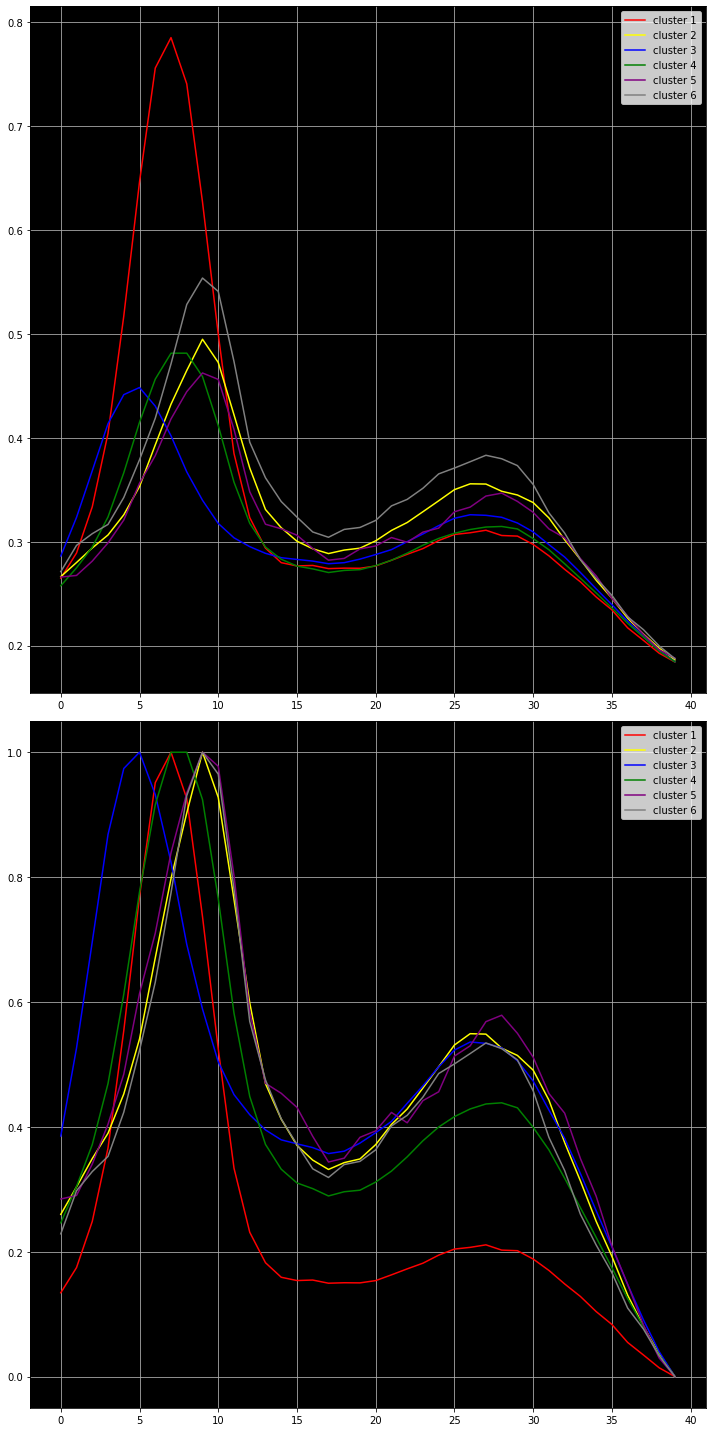

In [57]:
# cluster vs. cluster
lines = np.zeros((num_sel, s_dim))
sel_num = np.zeros(num_sel)

for h in range(num_img):
    for i in range(num_sel):
        for j in range(data_shape_new[h, 0]):
            for k in range(data_shape_new[h, 1]):
                if selected[i][h][j, k] == 1:
                    sel_num[i] += 1
                    lines[i] += reconstructed_reshape[h][j, k]
print(sel_num)
lines_nor = np.zeros((num_sel, s_dim))
for i in range(num_sel):
    lines_nor[i] = warp_scale(lines[i])

for i in range(num_sel):
    lines[i] /= sel_num[i]
            
fig11, ax11 = plt.subplots(2, 1, figsize=(10, 20))

for i in range(num_sel):
    ax11[0].plot((lines[i]), label="cluster %d"%(i+1), c=color_rep[i])
    ax11[1].plot((lines_nor[i]), label="cluster %d"%(i+1), c=color_rep[i])
ax11[0].grid()
ax11[0].set_facecolor("black")
ax11[0].legend()
ax11[1].grid()
ax11[1].set_facecolor("black")
ax11[1].legend()
fig11.tight_layout()

plt.show()

In [ ]:
plt.close(fig11)

In [ ]:
# cluster vs. cluster within an image
%matplotlib qt
lines = np.zeros((num_img, num_sel, s_dim))
sel_num = np.zeros((num_img, num_sel))

for h in range(num_img):
    for i in range(num_sel):
        for j in range(data_shape_new[h, 0]):
            for k in range(data_shape_new[h, 1]):
                if selected[i][h][j, k] == 1:
                    sel_num[h, i] += 1
                    lines[h, i] += reconstructed_reshape[h][j, k]

print(sel_num) 
#for h in range(num_img):            
#    for i in range(num_sel):
#        lines[h, i] = warp_scale(lines[h, i])

for h in range(num_img):
    for i in range(num_sel):
        lines[h, i] /= sel_num[h, i]
            
fig6, ax6 = plt.subplots(1, 1, figsize=(10, 10))

def img_selector(img_n):
    ax6.cla()
    for i in range(num_sel):
        ax6.plot((lines[img_n, i]), label="line %d"%(i+1), c=color_rep[i])
    ax6.grid()
    ax6.set_facecolor("black")
    fig6.canvas.draw()
    fig6.legend()
    fig6.tight_layout()
    
pyw.interact(img_selector, img_n=pyw.IntSlider(min=0, max=num_img-1, step=1, value=0))
plt.show()

In [ ]:
plt.close(fig6)

In [ ]:
# image vs. image depending on the component
%matplotlib qt
lines = np.zeros((num_img, num_sel, s_dim))
sel_num = np.zeros((num_img, num_sel))

for h in range(num_img):
    for i in range(num_sel):
        for j in range(data_shape_new[h, 0]):
            for k in range(data_shape_new[h, 1]):
                if selected[i][h][j, k] == 1:
                    sel_num[h, i] += 1
                    lines[h, i] += reconstructed_reshape[h][j, k]

print(sel_num) 
#for h in range(num_img):            
#    for i in range(num_sel):
#        lines[h, i] = warp_scale(lines[h, i])

for h in range(num_img):
    for i in range(num_sel):
        lines[h, i] /= sel_num[h, i]

#for h in range(num_img):
#    for i in range(num_sel):
#        lines[h, i] /= data_shape_new[h][0]*data_shape_new[h][1]
        
for h in range(num_img):
    lines[h] /= np.max(lines[h])
            
fig7, ax7 = plt.subplots(1, 1, figsize=(10, 10))

def comp_selector(n_sel):
    ax7.cla()
    for i in range(num_img):
        ax7.plot((lines[i, n_sel]), label="image %d"%(i+1), c=c=color_rep[i])
    ax7.grid()
    ax7.set_facecolor("black")
    fig7.canvas.draw()
    fig7.legend()
    fig7.tight_layout()
    
pyw.interact(comp_selector, n_sel=pyw.IntSlider(min=0, max=num_sel-1, step=1, value=0))
plt.show()

In [ ]:
plt.close(fig7)

In [43]:
cluster_ax_1 = 0
cluster_ax_2 = 1
X = np.stack((projections[:, cluster_ax_1], projections[:, cluster_ax_2]), axis=1)
print(X.shape)

(22176, 2)


In [44]:
%matplotlib inline

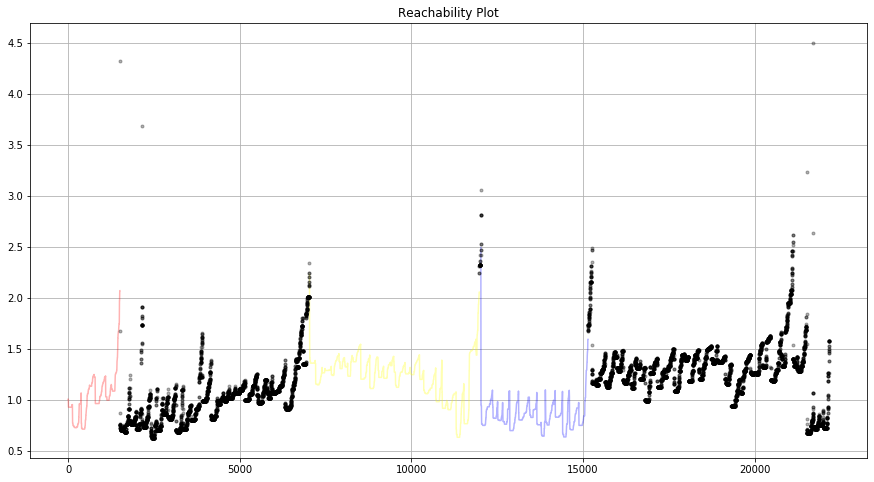

In [45]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py
# Ordering Points To Identify the Clustering Structure
clust = OPTICS(min_samples=100, xi=.05, min_cluster_size=.05).fit(X)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(15, 8))
# Reachability plot
colors = color_rep
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
plt.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
plt.grid()
plt.title('Reachability Plot')
plt.show()

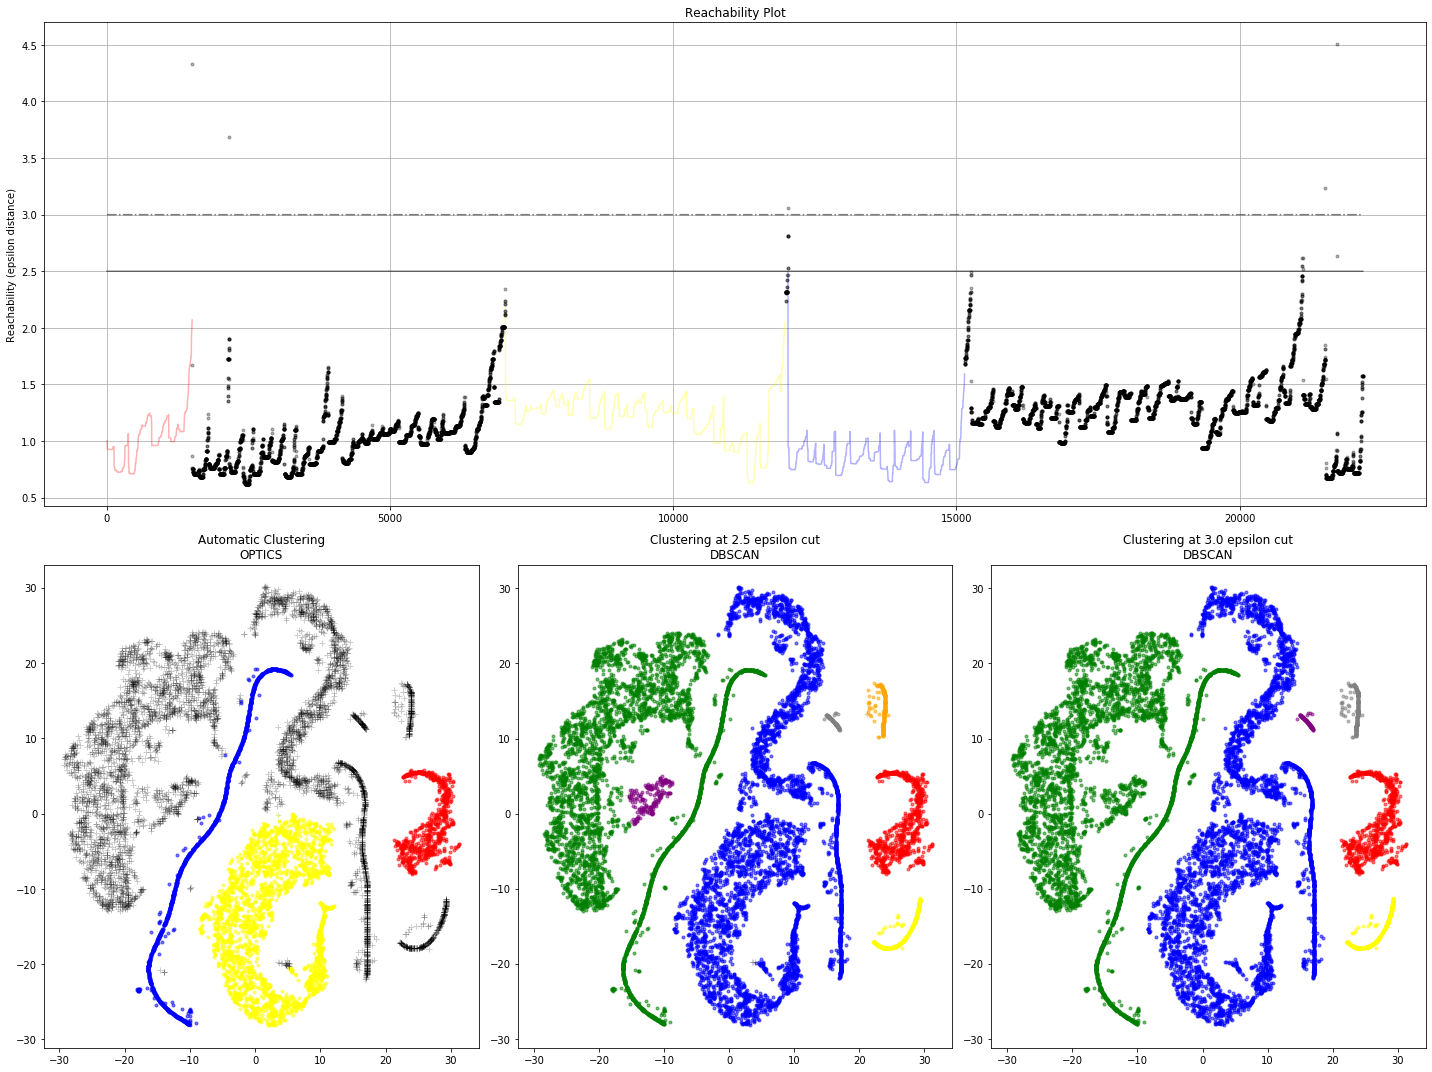

In [51]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py
ep1 = 2.5
ep2 = 3.0
labels_1 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=ep1)
labels_2 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=ep2)

fig8 = plt.figure(figsize=(20, 15))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
for klass, color in zip(range(0, len(colors)), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color=color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, ep1, dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, ep2, dtype=float), 'k-.', alpha=0.5)
ax1.grid()
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
for klass, color in zip(range(0, len(colors)), colors):
    Xk = X[clust.labels_ == klass]
    ax2.scatter(Xk[:, 0], Xk[:, 1], color=color, alpha=0.3, marker='.')
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN 1
for klass, color in zip(range(0, len(colors)), colors):
    Xk = X[labels_1 == klass]
    ax3.scatter(Xk[:, 0], Xk[:, 1], color=color, alpha=0.3, marker='.')
ax3.plot(X[labels_1 == -1, 0], X[labels_1 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at %.1f epsilon cut\nDBSCAN'%ep1)

# DBSCAN 2.
for klass, color in zip(range(0, len(colors)), colors):
    Xk = X[labels_2 == klass]
    ax4.scatter(Xk[:, 0], Xk[:, 1], color=color, alpha=0.3, marker='.')
ax4.plot(X[labels_2 == -1, 0], X[labels_2 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at %.1f epsilon cut\nDBSCAN'%ep2)

fig8.tight_layout()
plt.show()

In [52]:
label_sort = np.unique(labels_2)
print(label_sort)
num_label = len(label_sort)
label_copy = labels_2.copy()
print(label_copy.shape)
label_reshape = []
for i in range(num_img):
    temp = label_copy[:int(data_shape_new[i, 0]*data_shape_new[i, 1])]
    print(temp.shape)
    label_copy = np.delete(label_copy, range(int(data_shape_new[i, 0]*data_shape_new[i, 1])), axis=0)
    print(label_copy.shape)
    temp = np.reshape(temp, (data_shape_new[i, 0], data_shape_new[i, 1]))
    print(temp.shape)
    label_reshape.append(temp)

[0 1 2 3 4 5]
(22176,)
(11088,)
(11088,)
(252, 44)
(11088,)
(0,)
(252, 44)


In [53]:
selected = []
for i in range(num_label):
    temp = []
    for j in range(num_img):
        #print(i, label_sort[i], j)
        img_temp = np.array(label_reshape[j]).copy()
        img_temp[np.where(img_temp != label_sort[i])] = -10
        img_temp[np.where(img_temp == label_sort[i])] = 1
        img_temp[np.where(img_temp == -10)] = 0
        #print(len(np.nonzero(img_temp)[0]))
        temp.append(img_temp)
    selected.append(temp)

In [54]:
num_sel = num_label

In [59]:
%matplotlib qt
# for many images
fig9, ax9 = plt.subplots(1, num_img, figsize=(8, 6))
    
def map_selector(label):
    for i, axs in enumerate(ax9):
        axs.cla()
        axs.imshow(selected[label][i], cmap="afmhot")
        axs.set_title("label %d map"%(label_sort[label]), fontsize=10)
        axs.axis("off")
    fig9.canvas.draw()
    fig9.tight_layout()
    
pyw.interact(map_selector, label=pyw.IntSlider(min=0, max=num_label-1, step=1, value=0))
fig9.show()

interactive(children=(IntSlider(value=0, description='label', max=5), Output()), _dom_classes=('widget-interac…

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
# clustering using DBSCAN (Density-based Spatial Clustering of Applications with Noise)

db = DBSCAN(eps=7.0, min_samples=50).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db_labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

plt.figure(figsize=(10, 10))
# Black removed and is used for noise instead.
unique_labels = set(db_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
plt.grid()
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()